# Create Linear Regression Model from scratch
# YT - sentdex

&emsp;

## Imports

In [89]:
from IPython.display import Image
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

## Formulas

<div>
<img src="./images/formulas.jpg" width="500"/>
</div>


&emsp;

<div>
<img src="./images/r_squared.png" width="200"/>
</div>

In [90]:
#xs = np.array([1,2,3,4,5,6], dtype=np.float64)

In [91]:
#ys = np.array([5,4,6,5,6,7], dtype=np.float64)

&emsp;

In [92]:
def create_dataset(howMany, variance, step=2, correlation=False):
    
    val=1
    ys=[]
    for i in range(howMany):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [93]:
def best_fit_slope_intercept(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs**2)))
    
    b = mean(ys) - m*mean(xs)
    return m, b

In [94]:
def squared_error(ys_original, ys_line):
    return sum((ys_line-ys_original)**2)

In [95]:
def coefficient_of_determination(ys_original, ys_line):
    y_mean_line = [mean(ys_original) for y in ys_original]
    squared_error_regr = squared_error(ys_original, ys_line)
    squared_error_y_mean = squared_error(ys_original, y_mean_line)
    
    return 1 - (squared_error_regr / squared_error_y_mean)

In [96]:
xs, ys = create_dataset(40, 1, -1, correlation='pos')

In [97]:
print(xs)
print(ys)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39.]
[  1.  -1.  -1.  -3.  -3.  -4.  -5.  -6.  -8.  -8.  -9. -11. -11. -13.
 -14. -14. -16. -17. -17. -19. -20. -20. -21. -23. -23. -24. -26. -27.
 -27. -29. -30. -30. -31. -33. -34. -35. -35. -37. -38. -39.]


In [98]:
m, b = best_fit_slope_intercept(xs,ys)

In [99]:
print(m, b)

-1.0119136960600377 0.707317073170735


In [100]:
regression_line = [(m*x)+b for x in xs]

In [101]:
predict_x = 8
predict_y = (m*predict_x)+b

In [102]:
print(predict_x, predict_y)

8 -7.387992495309566


In [103]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.998313787734499


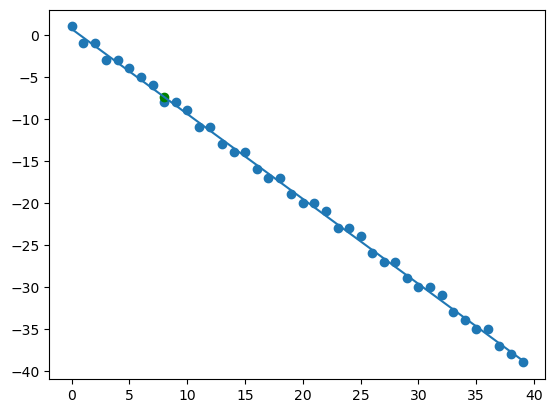

In [104]:
plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)
#plt.xlim([0,10])
#plt.ylim([0,9])
plt.show()